In [2]:
%pip install pandas
%pip install numpy
%pip install matplotip
%pip install seaborn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotip (from versions: none)
ERROR: No matching distribution found for matplotip


Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [36]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [37]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

Text(0.5, 1.0, "Distributions des classes d'obesité")

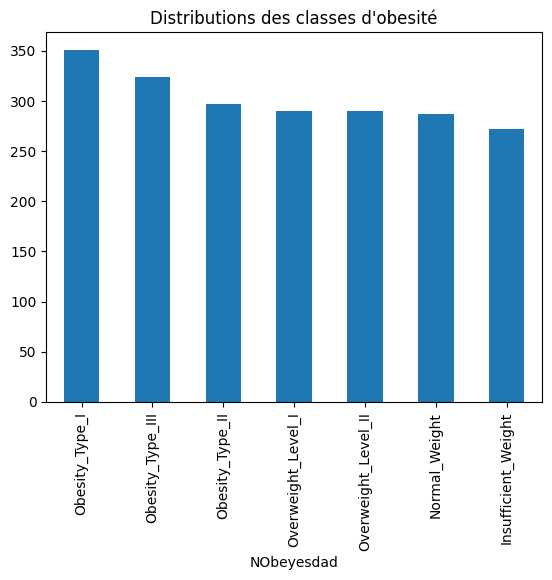

In [38]:
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.title("Distributions des classes d'obesité")

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib


X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']



le = LabelEncoder()
y = le.fit_transform(y)

print(dict(zip(le.classes_, le.transform(le.classes_))))

obj_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

print(f"String Columns: {obj_cols}")
print(f"Number Columns: {num_cols}")

encoding = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoding_features = X.copy()

if obj_cols:
    encoding_features[obj_cols] = encoding.fit_transform(X[obj_cols])

    for i, col in enumerate(obj_cols):
        objects = encoding.categories_[i]
        mapping = dict(zip(objects, range(len(objects))))
        print(f"{col} encoding: {mapping}")



X_train, X_test, y_train, y_test = train_test_split(encoding_features, y, test_size=0.2, random_state=42, stratify=y)


models = {
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42)

}


results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    trained_models[name] = model
    print(f"{name}")
    print("accuracy", acc)
    print(classification_report(y_test, y_pred, target_names=le.classes_))




print("Model Comparison (accuracy):")

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



    
random_forest_model = trained_models["Random Forest"]


joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(encoding, 'feature_encoder.pkl')






{'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}
String Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Number Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Gender encoding: {'Female': 0, 'Male': 1}
family_history_with_overweight encoding: {'no': 0, 'yes': 1}
FAVC encoding: {'no': 0, 'yes': 1}
CAEC encoding: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE encoding: {'no': 0, 'yes': 1}
SCC encoding: {'no': 0, 'yes': 1}
CALC encoding: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS encoding: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}


c:\Users\a\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\a\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
accuracy 0.7541371158392435
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.80      0.82        54
      Normal_Weight       0.59      0.62      0.61        58
     Obesity_Type_I       0.73      0.76      0.74        70
    Obesity_Type_II       0.82      0.92      0.87        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.67      0.64      0.65        58
Overweight_Level_II       0.60      0.53      0.56        58

           accuracy                           0.75       423
          macro avg       0.75      0.75      0.75       423
       weighted avg       0.75      0.75      0.75       423

Random Forest
accuracy 0.9598108747044918
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.83      1.00      0.91        58
     Obesity_Type_I       0.96      0.97      0.96  

['feature_encoder.pkl']